In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb 
from scipy import stats
import arviz as az

EJERCICIO 3

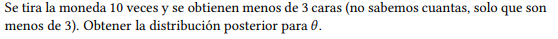

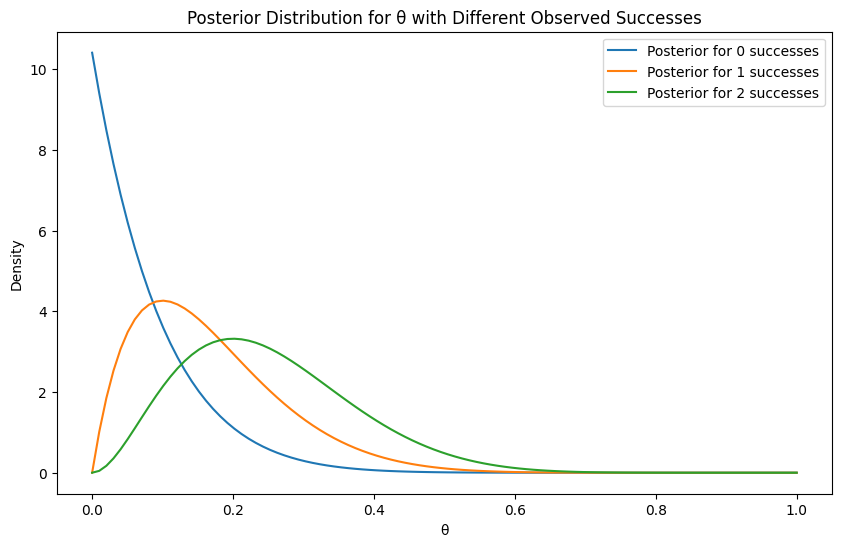

In [21]:
theta_grid = np.linspace(0, 1, 100)

observed_successes = [0, 1, 2]
trials = 10

plt.figure(figsize=(10, 6))

for y in observed_successes:
    likelihood_theta = stats.binom.pmf(k=y, n=trials, p=theta_grid)
    prior_theta = stats.uniform.pdf(theta_grid)
    posterior = prior_theta * likelihood_theta
    dtheta = np.diff(theta_grid)[0]
    posterior /= np.sum(posterior * dtheta)

    plt.plot(theta_grid, posterior, label=f'Posterior for {y} successes')

plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Distribution for θ with Different Observed Successes')
plt.show()


EJERCICIO 4

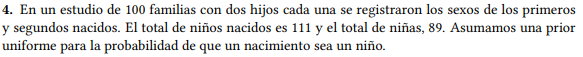
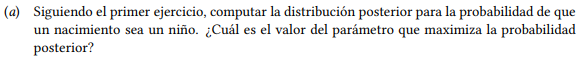

El valor del parámetro que maximiza la probabilidad posterior (MAP) es: 0.5555555555555556


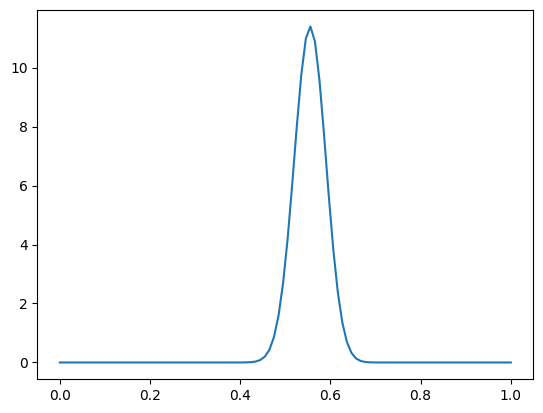

In [22]:
theta_grid = np.linspace(0, 1, 100)

trials = 200
successes = 111

likelihood_theta = stats.binom.pmf(k=successes, n=trials, p=theta_grid)
prior_theta = stats.uniform.pdf(theta_grid)
posterior = prior_theta * likelihood_theta
dtheta = np.diff(theta_grid)[0]
posterior /= np.sum(posterior * dtheta)

plt.plot(theta_grid, posterior, label=f'Posterior for {y} successes')

map_estimate = theta_grid[np.argmax(posterior)]

print(f"El valor del parámetro que maximiza la probabilidad posterior (MAP) es: {map_estimate}")

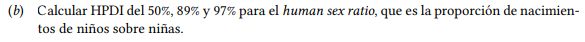

In [27]:
samples = np.random.choice(theta_grid, size=int(1e4), p=posterior*dtheta)

hpdi_50 = az.hdi(samples,hdi_prob=.5)
hpdi_89 = az.hdi(samples,hdi_prob=.89)
hpdi_97 = az.hdi(samples,hdi_prob=.97)

print('HpDI 50% = ',hpdi_50)
print('HpDI 89% = ',hpdi_89)
print('HpDI 97% = ',hpdi_97)

HpDI 50% =  [0.54545455 0.58585859]
HpDI 89% =  [0.49494949 0.60606061]
HpDI 97% =  [0.48484848 0.62626263]


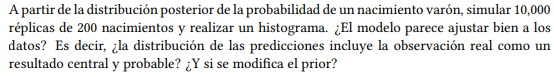

HPDI 90% (posterior predictiva) =  [ 94 126]


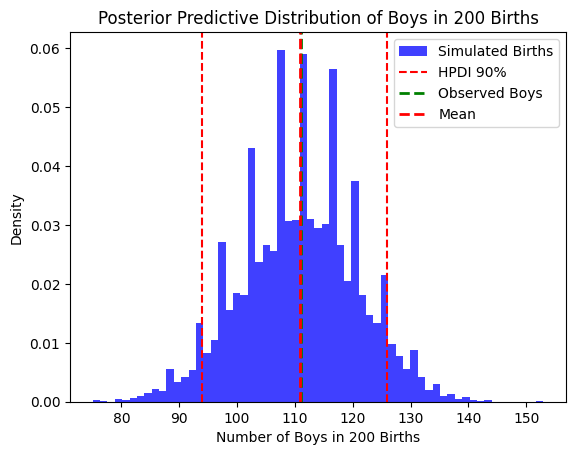

In [34]:
samples_pred = stats.binom.rvs(n=200, p=samples, size=10000)

hpdi_pred = az.hdi(samples_pred, hdi_prob=0.9)
print('HPDI 90% (posterior predictiva) = ', hpdi_pred)

plt.hist(samples_pred, bins='auto', density=True, alpha=0.75, color='blue', label='Simulated Births')
plt.axvline(hpdi_pred[0], ls='--', color='r', label='HPDI 90%')
plt.axvline(hpdi_pred[1], ls='--', color='r')
plt.axvline(111, color='g', linestyle='dashed', linewidth=2, label='Observed Boys')
plt.axvline(np.mean(samples_pred), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.xlabel('Number of Boys in 200 Births')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution of Boys in 200 Births')
plt.show()
